 **1.**READING THE DATASET

In [17]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/dataset.csv'

try:
  df = pd.read_csv(file_path)
  print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  


**2.**CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

In [18]:
# prompt: CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

import pandas as pd
# READING THE DATASET

# Replace 'your_file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/dataset.csv'

try:
  df = pd.read_csv(file_path)
  print(df.head()) # Display the first few rows of the DataFrame

  # CHECKING MISSING VALUES
  missing_values = df.isnull().sum()
  print("\nMissing Values:\n", missing_values)

  # CHECKING FOR DUPLICATE ROWS
  duplicate_rows = df[df.duplicated()]
  if not duplicate_rows.empty:
    print("\nDuplicate Rows:\n", duplicate_rows)
  else:
    print("\nNo duplicate rows found.")

except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  

Missing Values:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

No duplicate rows found.


**3.**PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


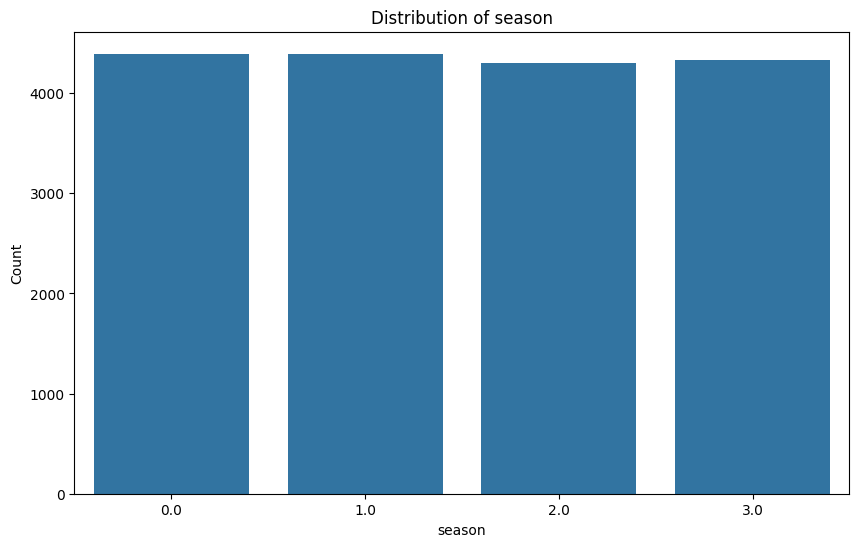

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE
discrete_features = ['season', 'holiday', 'workingday', 'weathersit']  # Replace with your actual discrete feature names

# Print the available columns in the DataFrame to verify column names
print(df.columns)

for feature in discrete_features:
    plt.figure(figsize=(10, 6))

    # Check if the feature exists in the DataFrame columns
    if feature in df.columns:
        sns.countplot(x=feature, data=df)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Warning: Column '{feature}' not found in DataFrame. Skipping plot.")

**4.**LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

In [20]:
#  LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

print(df.dtypes)

# Assuming 'timestamp' is the column name for the timestamp data
if 'timestamp' in df.columns:
    try:
        # Convert 'timestamp' column to datetime objects
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        # Set 'timestamp' column as the index
        df = df.set_index('timestamp')

        # Print the updated DataFrame with datetime index
        print(df.head())
        print(df.index)

    except ValueError as e:
        print(f"Error converting 'timestamp' column to datetime: {e}")
        print("Please check the format of the 'timestamp' column.")
    except KeyError:
        print("Error: 'timestamp' column not found in the DataFrame.")
else:
    print("Error: 'timestamp' column not found in the DataFrame.")

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0 

**5.**MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

In [21]:
# prompt: MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.
# Assuming 'timestamp' is now the index and of datetime type
if isinstance(df.index, pd.DatetimeIndex):
    df['day_of_week'] = df.index.dayofweek
    df['day_of_month'] = df.index.day
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    df['year'] = df.index.year

    # Example of creating a season feature (adjust the logic as needed for your data)
    df['season_engineered'] = (df.index.month % 12 + 3) // 3

    print(df.head())
else:
    print("Error: 'timestamp' is not set as the index or is not of datetime type.")

                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  day_of_week  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0     3.0            6   
2015-01-04 01:00:00         0.0         1.0     3.0            6   
2015-01-04 02:00:00         0.0         1.0     3.0            6   
2015-01-04 03:00:00         0.0         1.0     3.0            6   
2015-01-04 04:00:00         0.0         1.0     3.0            6   

                     day_

**6.**VISUALIZING THE CORRELATION WITH A HEATMAP

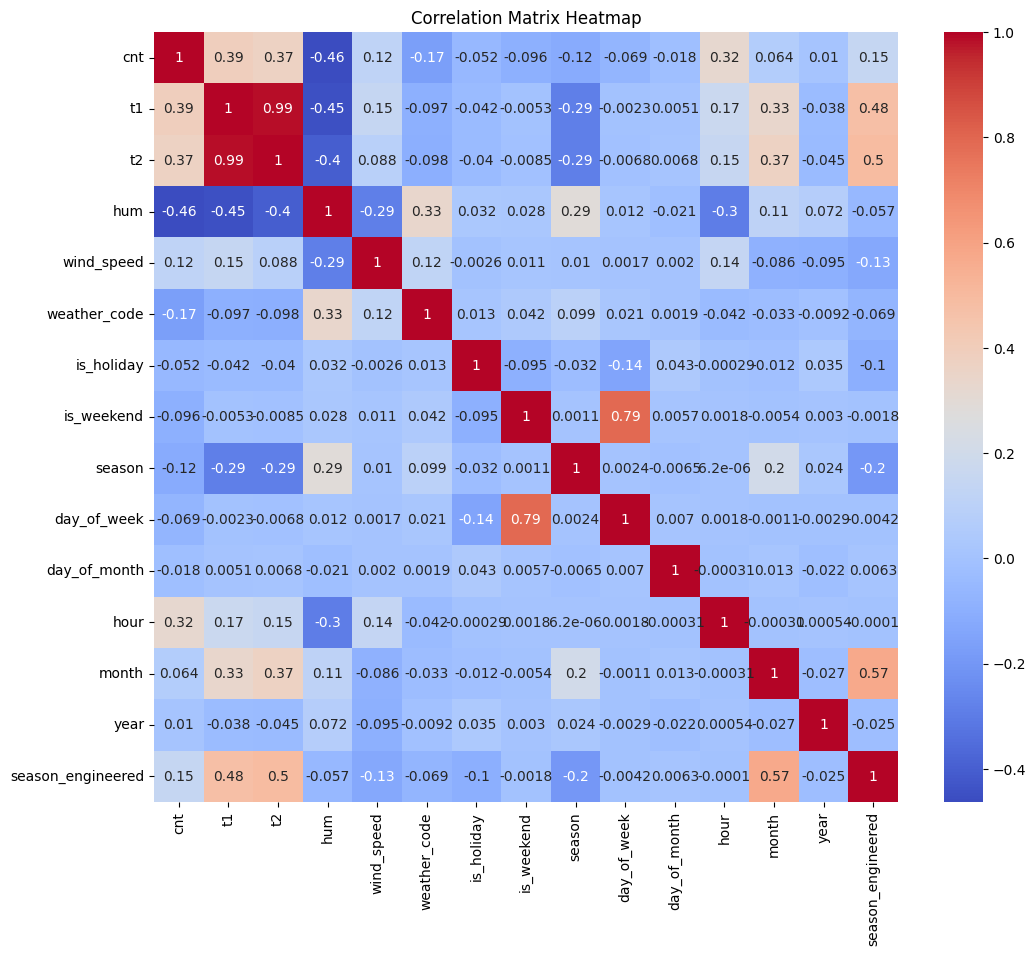

In [22]:
#VISUALIZING THE CORRELATION WITH A HEATMAP
plt.figure(figsize=(12, 10))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

**7.**VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

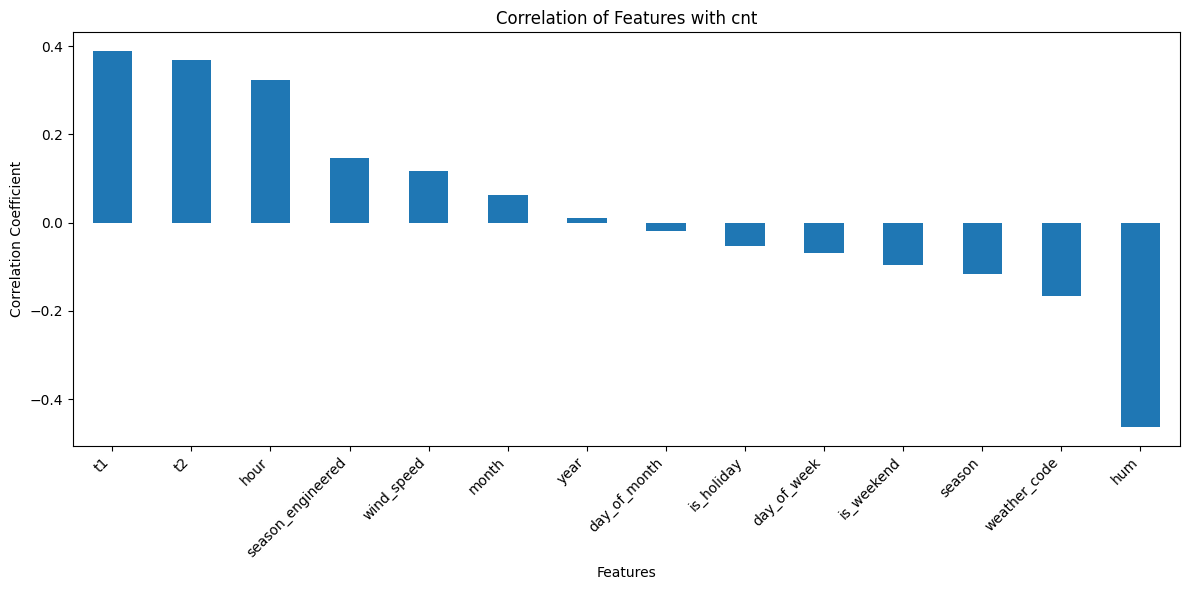

In [23]:
# VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO
# Assuming 'cnt' is your target variable. Replace 'cnt' with your actual target variable name if different.
target_variable = 'cnt'

if target_variable in df.columns:
    plt.figure(figsize=(12, 6))
    df.corr()[target_variable].sort_values(ascending=False).drop(target_variable).plot(kind='bar')
    plt.title(f'Correlation of Features with {target_variable}')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print(f"Error: Target variable '{target_variable}' not found in the DataFrame.")

**8.**PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

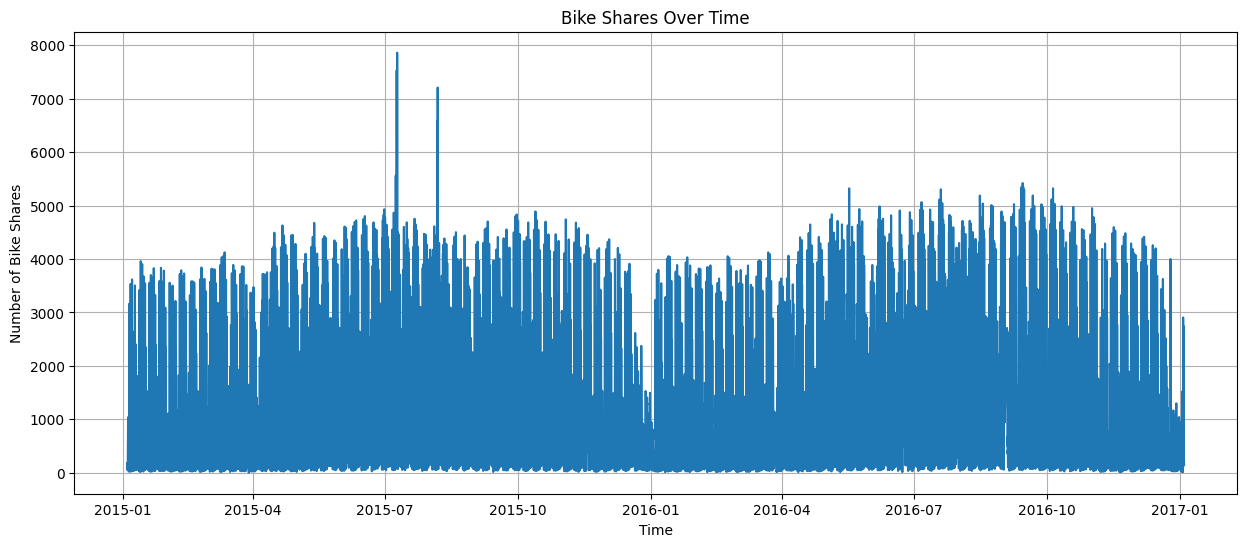

In [24]:
# PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT
# Assuming 'cnt' is the column representing bike shares. Replace with your actual column name.
target_variable = 'cnt'

if target_variable in df.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df[target_variable])
    plt.title('Bike Shares Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Bike Shares')
    plt.grid(True)
    plt.show()
else:
    print(f"Error: Column '{target_variable}' not found in the DataFrame.")

**9.**PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH BARPLOT

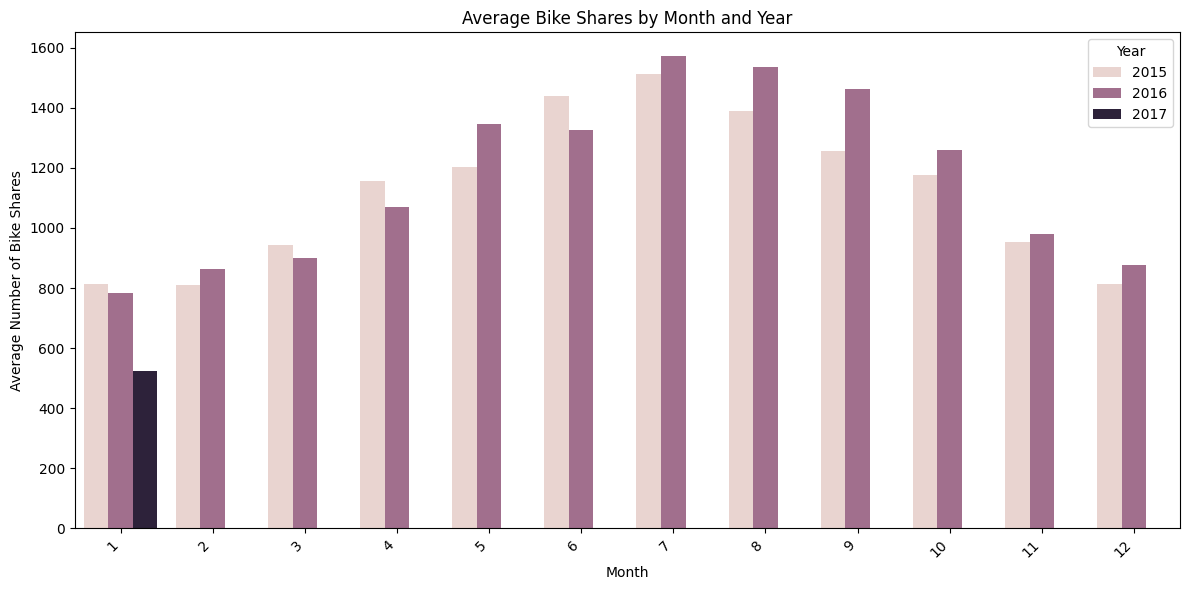

In [25]:
#PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH BARPLOT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cnt' is the column representing bike shares and you have 'month' and 'year' columns.
target_variable = 'cnt'

if target_variable in df.columns and 'month' in df.columns and 'year' in df.columns:
    plt.figure(figsize=(12, 6))

    # Group data by month and year, then calculate the mean of the target variable
    bike_shares_by_month_year = df.groupby(['month', 'year'])[target_variable].mean().reset_index()

    # Create the bar plot
    sns.barplot(x='month', y=target_variable, hue='year', data=bike_shares_by_month_year)

    plt.title('Average Bike Shares by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Bike Shares')
    plt.legend(title='Year')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print(f"Error: One or more required columns ('{target_variable}', 'month', 'year') not found in the DataFrame.")

**10.**PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH LINEPLOT

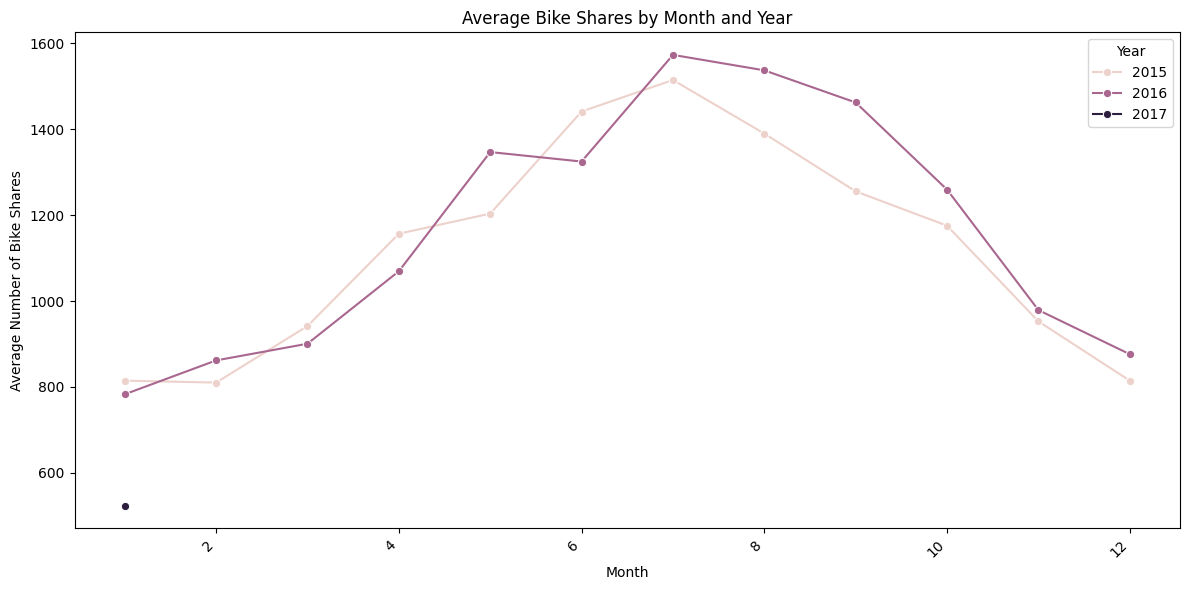

In [26]:
# prompt: PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH LINEPLOT
# Assuming 'cnt' is the column representing bike shares and you have 'month' and 'year' columns.
target_variable = 'cnt'

if target_variable in df.columns and 'month' in df.columns and 'year' in df.columns:
    plt.figure(figsize=(12, 6))

    # Group data by month and year, then calculate the mean of the target variable
    bike_shares_by_month_year = df.groupby(['month', 'year'])[target_variable].mean().reset_index()

    # Create the line plot
    sns.lineplot(x='month', y=target_variable, hue='year', data=bike_shares_by_month_year, marker='o')

    plt.title('Average Bike Shares by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Bike Shares')
    plt.legend(title='Year')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print(f"Error: One or more required columns ('{target_variable}', 'month', 'year') not found in the DataFrame.")

**11.**PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH POINTPOT

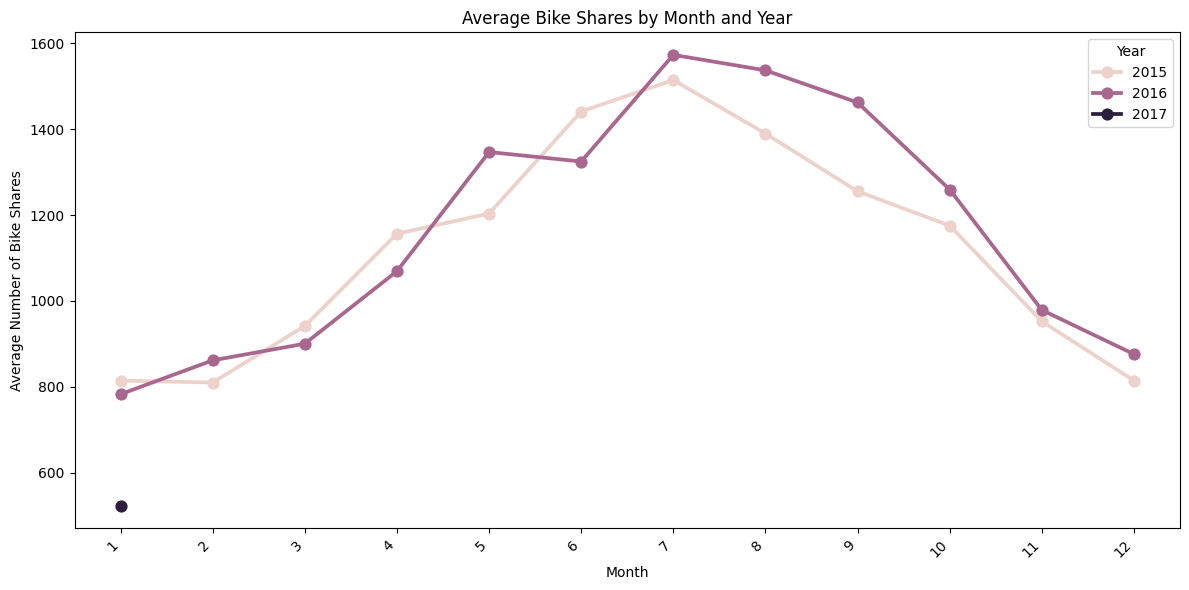

In [27]:
# PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH POINTPOT
target_variable = 'cnt'

if target_variable in df.columns and 'month' in df.columns and 'year' in df.columns:
    plt.figure(figsize=(12, 6))

    # Group data by month and year, then calculate the mean of the target variable
    bike_shares_by_month_year = df.groupby(['month', 'year'])[target_variable].mean().reset_index()

    # Create the point plot
    sns.pointplot(x='month', y=target_variable, hue='year', data=bike_shares_by_month_year)

    plt.title('Average Bike Shares by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Bike Shares')
    plt.legend(title='Year')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print(f"Error: One or more required columns ('{target_variable}', 'month', 'year') not found in the DataFrame.")

**12.**PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

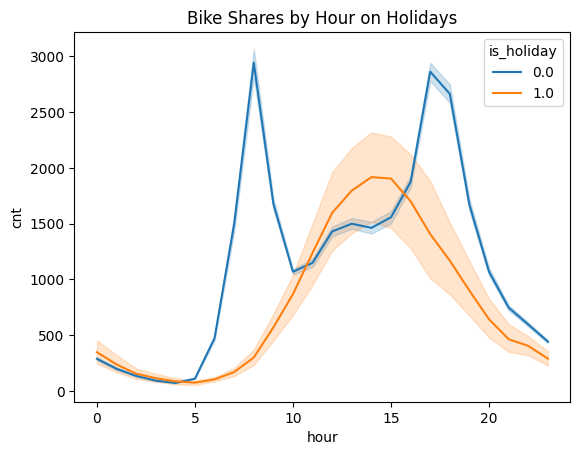

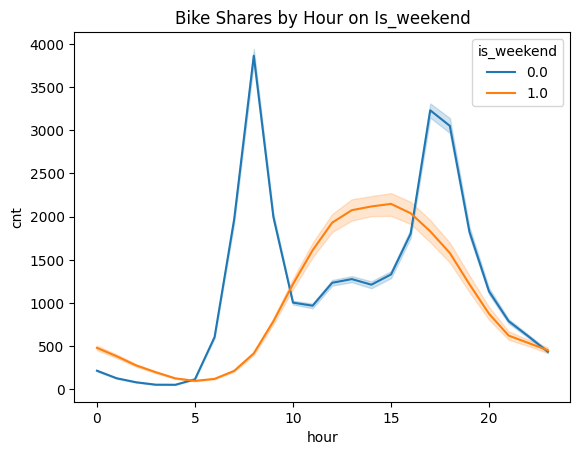

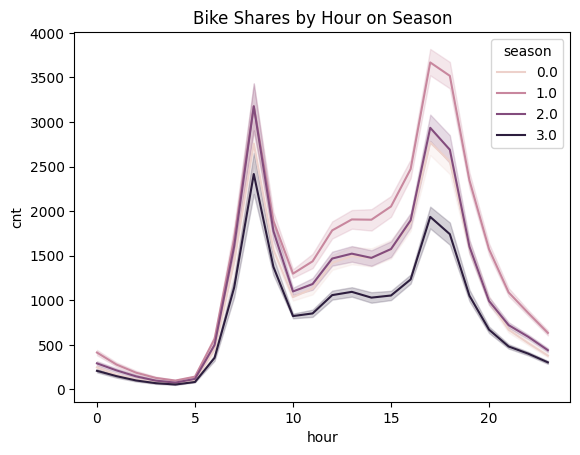

In [42]:
# Example for holidays
sns.lineplot(data=df, x='hour', y='cnt', hue='is_holiday') # Changed y to 'cnt' and hue to 'is_holiday'
plt.title('Bike Shares by Hour on Holidays')
plt.show()

# Repeat for 'weekend' and 'season'
for col in ['is_weekend', 'season']: # Changed to 'is_weekend' to match the column name
    sns.lineplot(data=df, x='hour', y='cnt', hue=col) # Changed y to 'cnt'
    plt.title(f'Bike Shares by Hour on {col.capitalize()}')
    plt.show()




**13.**PLOTTING BIKE SHARES BY DAY OF WEEK

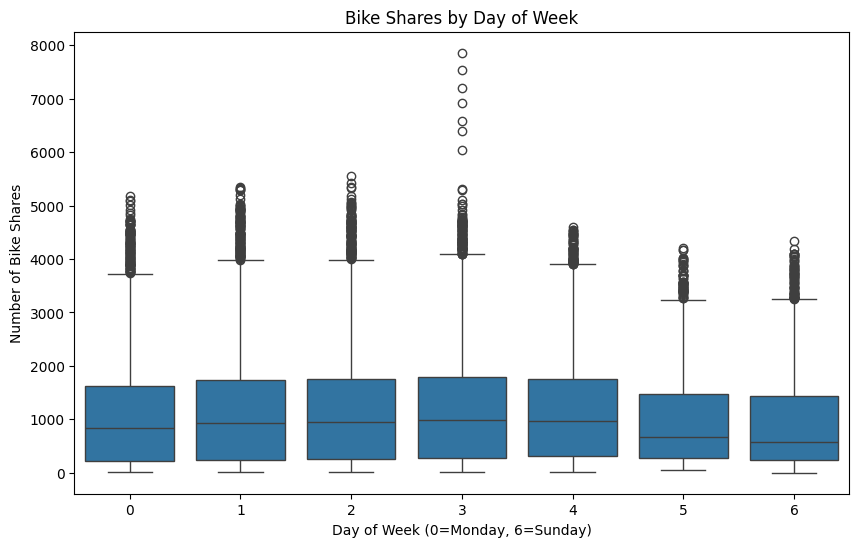

In [33]:

# PLOTTING BIKE SHARES BY DAY OF WEEK
target_variable = 'cnt'

if target_variable in df.columns and 'day_of_week' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='day_of_week', y=target_variable, data=df)
    plt.title('Bike Shares by Day of Week')
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
    plt.ylabel('Number of Bike Shares')
    plt.show()
else:
    print(f"Error: One or more required columns ('{target_variable}', 'day_of_week') not found in the DataFrame.")

**14.**PLOTTING BIKE SHARES BY DAY OF MONTH

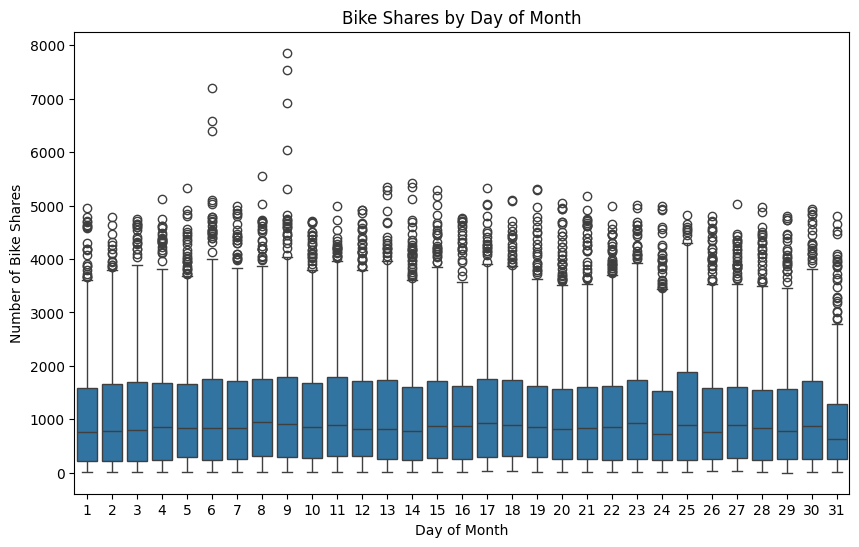

In [34]:
# PLOTTING BIKE SHARES BY DAY OF MONTH
target_variable = 'cnt'

if target_variable in df.columns and 'day_of_month' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='day_of_month', y=target_variable, data=df)
    plt.title('Bike Shares by Day of Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Bike Shares')
    plt.show()
else:
    print(f"Error: One or more required columns ('{target_variable}', 'day_of_month') not found in the DataFrame.")

**15.**PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

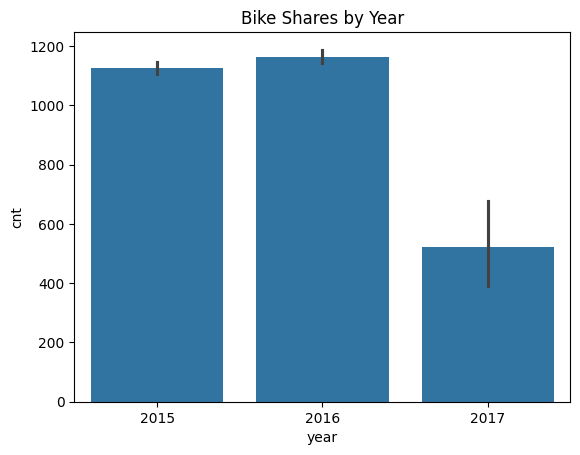

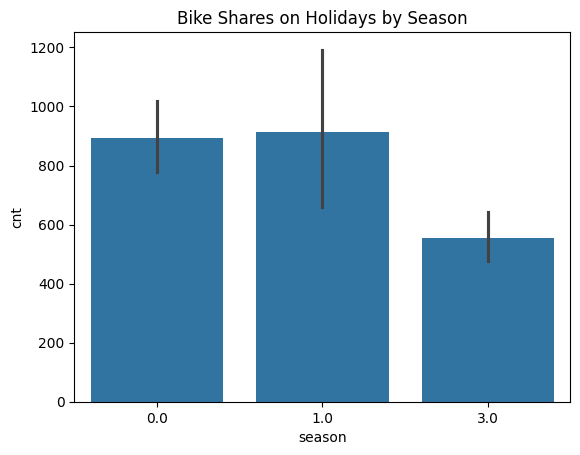

In [36]:
sns.barplot(data=df, x='year', y='cnt')  # Changed 'bike_shares' to 'cnt'
plt.title('Bike Shares by Year')
plt.show()

# Plot holidays by season
sns.barplot(data=df[df['is_holiday'] == 1], x='season', y='cnt')  # Changed 'bike_shares' to 'cnt' and 'holiday' to 'is_holiday'
plt.title('Bike Shares on Holidays by Season')
plt.show()


**16.**VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART

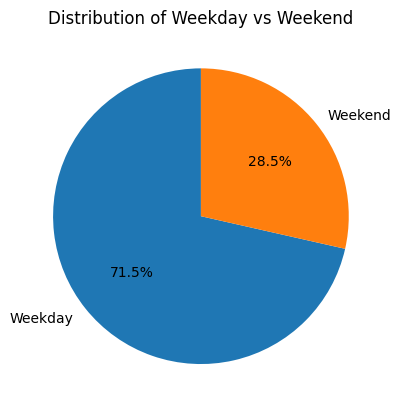

In [38]:
# Assuming 'is_weekend' column represents weekend status (0 or 1)
weekend_counts = df['is_weekend'].value_counts()  # Changed 'weekend' to 'is_weekend'
plt.pie(weekend_counts, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weekday vs Weekend')
plt.show()

17.VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHARTBARPLOT

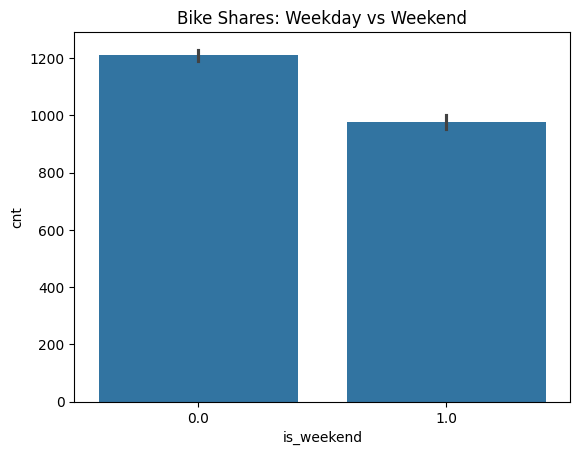

In [39]:

# Using 'is_weekend' and assuming 'cnt' represents bike shares
sns.barplot(data=df, x='is_weekend', y='cnt')  # Changed 'weekend' to 'is_weekend' and 'bike_shares' to 'cnt'
plt.title('Bike Shares: Weekday vs Weekend')
plt.show()


**18.**PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

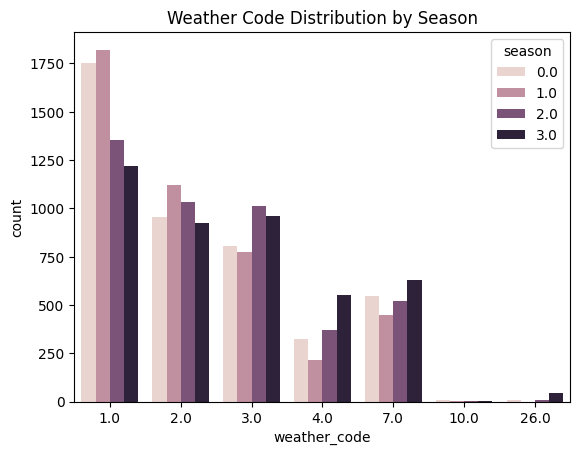

In [41]:
sns.countplot(data=df, x='weather_code', hue='season')
plt.title('Weather Code Distribution by Season')
plt.show()